# K-Means

### Setup

In [3]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Anomaly-Detection"):
    raise ValueError("Please change working directory to 'path/to/Clustering-and-Anomaly-Detection' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Anomaly-Detection


In [4]:
!pip install -r requirements.txt

  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 k

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

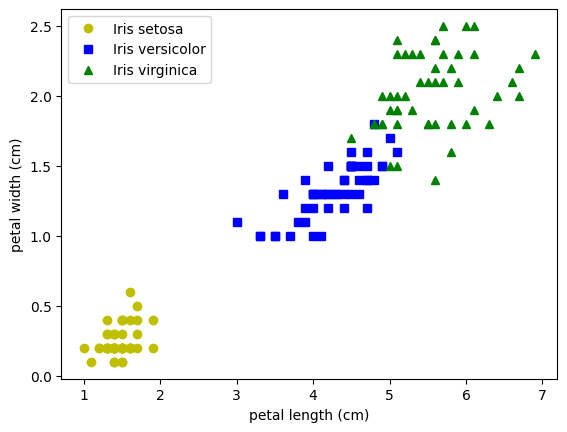

In [28]:
plt.plot(X_iris[y_iris==0, 2], X_iris[y_iris==0, 3], "yo",label="Iris setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="Iris virginica")

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()